#### Exercise 2.1 \[★\]
Now, we want to create multiple subplots. A simple way is given below.
Recall in [first practical session](./practicals1.html), we did group by
on multiple columns. Subplots can be used to visualize these data.

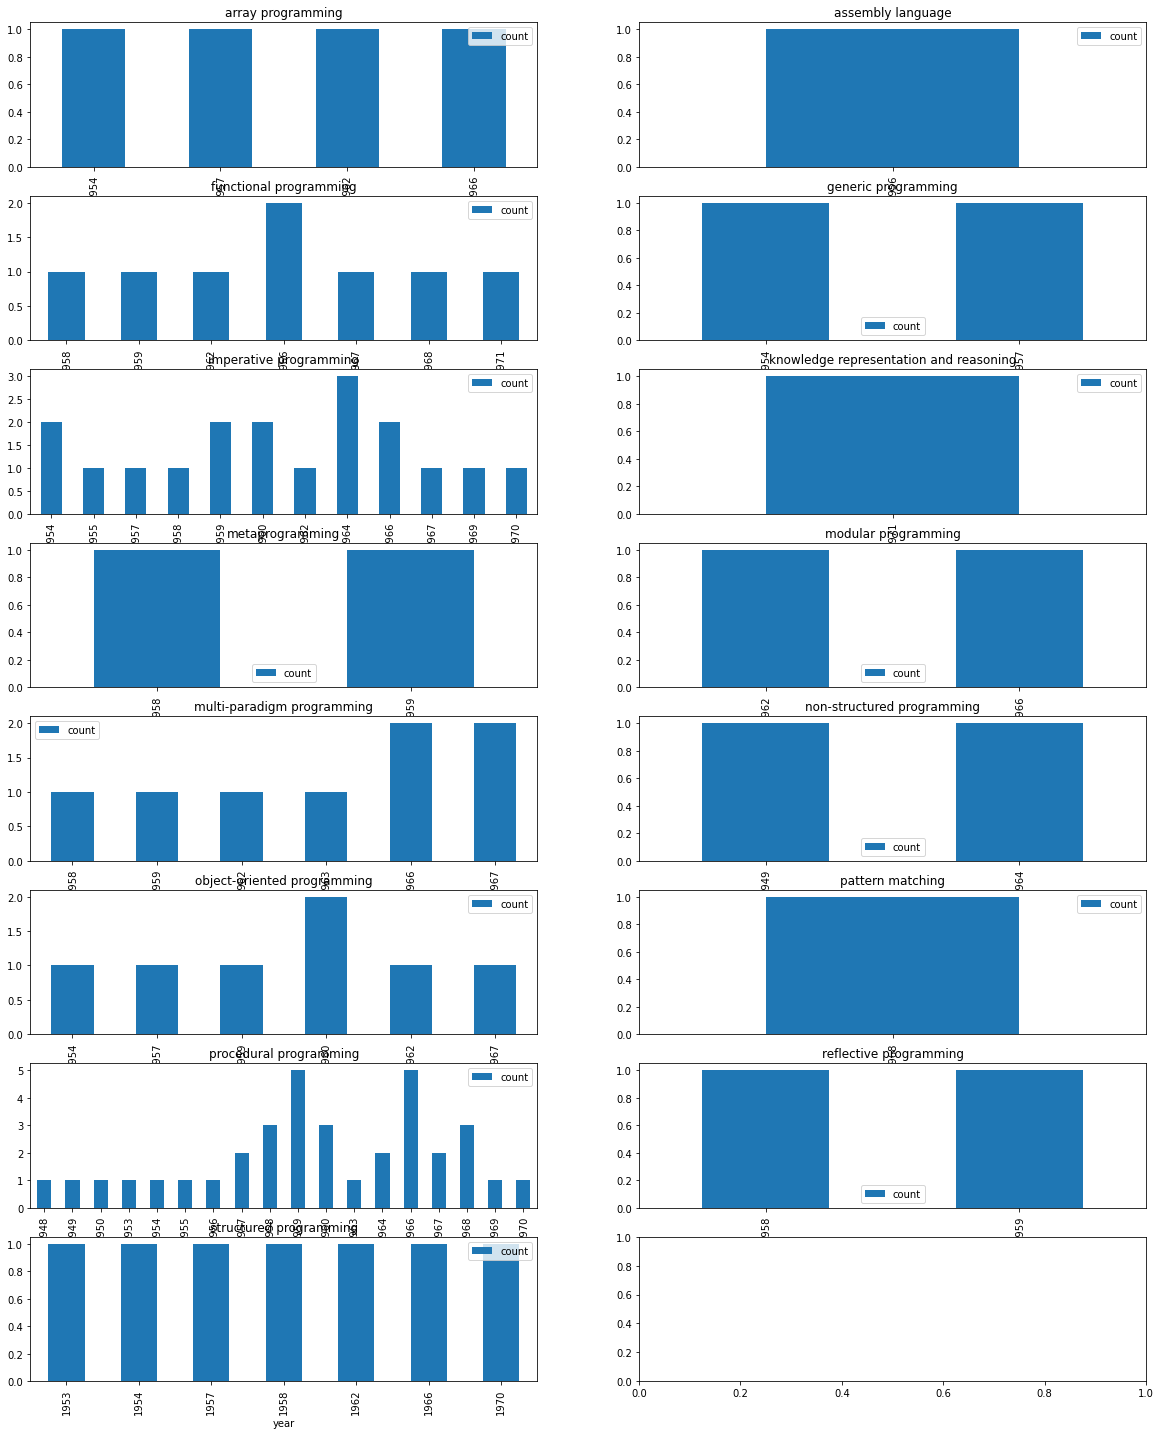

In [1]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot
jsondata = json.load(open('../../data/plparadigm.json'))

array = []
for data in jsondata:
    array.append([data['year'], data['languageLabel'], data['paradigmLabel']])

dataframe = pd.DataFrame(array, columns=['year', 'languageLabel', 'paradigmLabel'])
dataframe = dataframe.astype(dtype= {"year" : "int64", "languageLabel" : "<U200", "paradigmLabel" : "<U200"})
grouped = dataframe.groupby(['paradigmLabel', 'year']).count()
grouped = grouped.rename(columns={'languageLabel':'count'})
grouped = grouped.groupby(['paradigmLabel'])

# #Initialization of subplots
nr = math.ceil(grouped.ngroups/2)
fig, axes = plot.subplots(nrows=nr, ncols=2, figsize=(20,25))

#Creation of subplots
for i, group in enumerate(grouped.groups.keys()):
    g = grouped.get_group(group).reset_index()
    g.plot(x='year', y='count', kind='bar',
    title=group, ax=axes[math.floor(i/2),i%2])
plot.show()

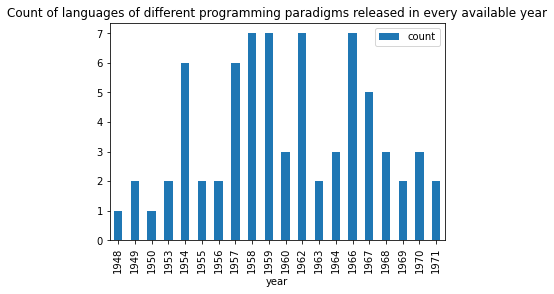

In [3]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot
jsondata = json.load(open('../../data/plparadigm.json'))

array = []
for data in jsondata:
    array.append([data['year'], data['languageLabel'], data['paradigmLabel']])

dataframe = pd.DataFrame(array, columns=['year', 'languageLabel', 'paradigmLabel'])
dataframe = dataframe.astype(dtype= {"year" : "int64", "languageLabel" : "<U200", "paradigmLabel" : "<U200"})
grouped = dataframe.groupby(['paradigmLabel', 'year']).count()
grouped = grouped.rename(columns={'languageLabel':'count'})
grouped = grouped.groupby(['year']).count()
grouped.plot(kind='bar', title="Count of languages of different programming paradigms released in every available year")
plot.show()

#### Exercise 2.2 \[★\]
Your next question is to get the top 20 intensities in each band and
create a single plot of these top intensities. Write a python program
that can achieve this.

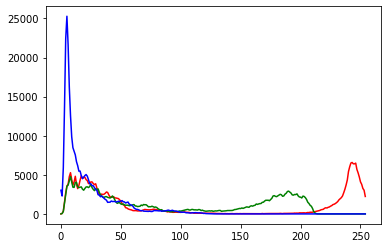

In [6]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]

x = range(255)
y = []
for i in x:
    y.append((red[i],green[i],blue[i]))

figure, axes = plot.subplots()
axes.set_prop_cycle('color', ['red', 'green', 'blue'])
plot.plot(x,y)
plot.show()

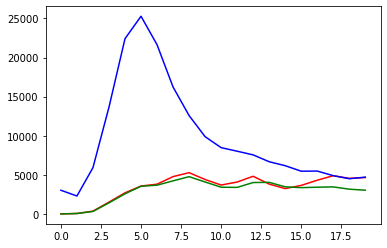

In [5]:
from PIL import Image
import matplotlib.pyplot as plot
imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
red = histogram[0:255][:20]
green = histogram[256:511][:20]
blue = histogram[512:767][:20]
x=range(20)
y = []
for i in x:
    y.append((red[i],green[i],blue[i]))
figure, axes = plot.subplots()
axes.set_prop_cycle('color', ['red', 'green', 'blue'])
plot.plot(x,y)
plot.show()

[2 2 2 ... 0 0 0]


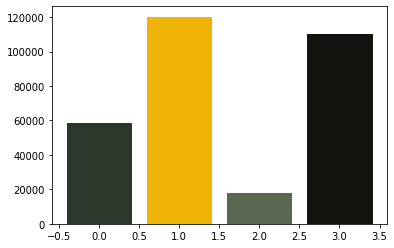

In [36]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans


clusterNumber = int(input('How many clusters ? '))

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
clusters = KMeans(n_clusters = clusterNumber)
npbins = numpy.arange(0, clusterNumber + 1)

clusters.fit(numarray)


histogram = numpy.histogram(clusters.labels_, bins=npbins)
print(clusters.labels_)
labels = numpy.unique(clusters.labels_)
barlist = plot.bar(labels, histogram[0])

for i in range(clusterNumber):
    barlist[i].set_color('#%02x%02x%02x' % (
        math.ceil(clusters.cluster_centers_[i][0]), 
        math.ceil(clusters.cluster_centers_[i][1]),
        math.ceil(clusters.cluster_centers_[i][2]))
    )
plot.show()